<a href="https://colab.research.google.com/github/adityaras/Reinforcement-Learning-CSE564-M2020/blob/master/HW1/RL_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **RL Home-Work 1**

In [1]:
# numpy for Guassian Distribution Functions
# matplotlib to plot Graphs
# random for Random Integer Value Generation

import numpy as np
import matplotlib.pyplot as plt
import random

## **Q1**

In [2]:
# Function to compute Average Reward over 2000 independent runs of a '10' armed bandit problem for a fixed value of epsilon.
def e_greedy(epsilon,var):
  sum_rt=[0]*1000
  sum_error=[0]*1000
  opt_act=[0]*1000
  for j in range(2000):  
    q_star=[]                                                                                 # Store the True values of 10 arms drawn form a Standard Normal Guassian Distribution.
    for i1 in range(10):
      q_star.append(np.random.normal(0,1))
    Q_t=[0]*10                                                                                # Initialization
    optimal_arm=np.argmax(q_star)
    times_picked=[0]*10
    for i in range(1000):
      prob=random.random()
      if prob <= epsilon :                                                                    # Exploration
        ind=random.randint(0,9)    
      else:                                                                                   # Exploitation
        ind=np.argmax(Q_t)
      times_picked[ind]+=1
      r_t=np.random.normal(q_star[ind],var)
      sum_error[i]+=abs(r_t-Q_t[ind])
      Q_t[ind]=(Q_t[ind]*((times_picked[ind]-1)/(times_picked[ind])))+(r_t/times_picked[ind])
      sum_rt[i]+=r_t
      if ind == optimal_arm:
        opt_act[i]+=1
  for k in range(1000):
    sum_rt[k]=sum_rt[k]/2000
    sum_error[k]=sum_error[k]/2000
    opt_act[k]=opt_act[k]/20
  return sum_rt,opt_act,sum_error 

In [3]:
# Average Values of Rewards, Optimal Action, Absolute Error for epsilon = 0.1, 0.01, 0
eps_0pnt1,opt_0pnt1,err_0pnt1=e_greedy(0.1,1)
eps_0pnt01,opt_0pnt01,err_0pnt01=e_greedy(0.01,1)
eps_0,opt_0,err_0=e_greedy(0,1)

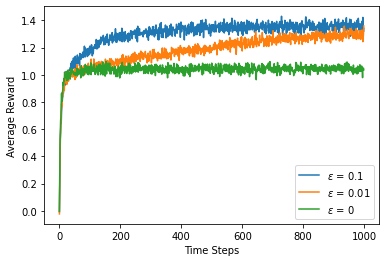

In [4]:
# plotting the Graph for '3' fixed values of Epsilon
plt.plot(eps_0pnt1)
plt.plot(eps_0pnt01)
plt.plot(eps_0)
plt.ylabel("Average Reward")
plt.xlabel("Time Steps")
plt.legend(["$\epsilon$ = 0.1","$\epsilon$ = 0.01","$\epsilon$ = 0"])
plt.show()

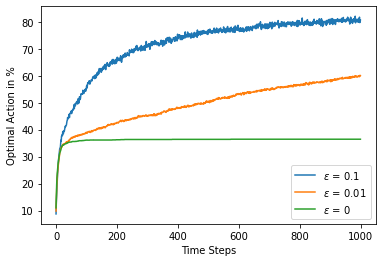

In [5]:
# plotting the Graph for '3' fixed values of Epsilon
plt.plot(opt_0pnt1)
plt.plot(opt_0pnt01)
plt.plot(opt_0)
plt.ylabel("Optimal Action in %")
plt.xlabel("Time Steps")
plt.legend(["$\epsilon$ = 0.1","$\epsilon$ = 0.01","$\epsilon$ = 0"])
plt.show()

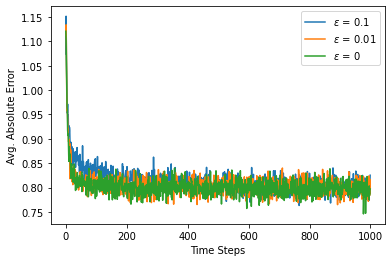

In [6]:
# plotting the Graph for '3' fixed values of Epsilon
plt.plot(err_0pnt1)
plt.plot(err_0pnt01)
plt.plot(err_0)
plt.ylabel("Avg. Absolute Error")
plt.xlabel("Time Steps")
plt.legend(["$\epsilon$ = 0.1","$\epsilon$ = 0.01","$\epsilon$ = 0"])
plt.show()

In [7]:
# Average Reward over 2000 independent runs of a '10' armed bandit problem for epsilon that varies over time i.e. epsilon = 1/t
def e_greedy_t(var):
  eps_t=[0]*1000
  opt_t=[0]*1000
  err_t=[0]*1000
  for j in range(2000):  
    q_star=[]                                                                                     # Store the True values of 10 arms drawn form a Standard Normal Guassian Distribution.                                                                            
    for i1 in range(10):  
      q_star.append(np.random.normal(0,1))
    Q_t=[0]*10                                                                                    # Initialization
    optimal_arm=np.argmax(q_star)
    times_picked=[0]*10
    for i in range(1,1001):
      epsilon = 1/i
      prob=random.random()
      if prob <= epsilon :                                                                        # Exploration
        ind=random.randint(0,9)    
      else:                                                                                       # Exploitation
        ind=np.argmax(Q_t)
      times_picked[ind]+=1
      r_t=np.random.normal(q_star[ind],var)
      err_t[i-1]+=abs(r_t-Q_t[ind])
      Q_t[ind]=(Q_t[ind]*((times_picked[ind]-1)/(times_picked[ind])))+(r_t/times_picked[ind])
      eps_t[i-1]+=r_t
      if ind == optimal_arm:
          opt_t[i-1]+=1
  for k in range(1000):
    eps_t[k]=eps_t[k]/2000
    opt_t[k]=opt_t[k]/20
    err_t[k]=err_t[k]/2000
  return eps_t,err_t,opt_t


In [8]:
# calling the Function
eps_t,err_t,opt_t = e_greedy_t(1)

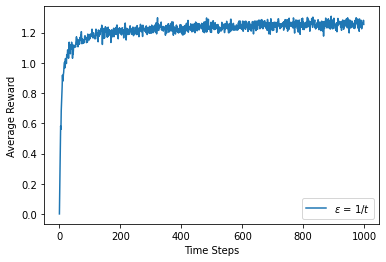

In [9]:
# plotting the Graph for epsilon that varies over time i.e. epsilon = 1/t
plt.plot(eps_t)
plt.ylabel("Average Reward")
plt.xlabel("Time Steps")
plt.legend(["$\epsilon$ = $1/t$"])
plt.show()

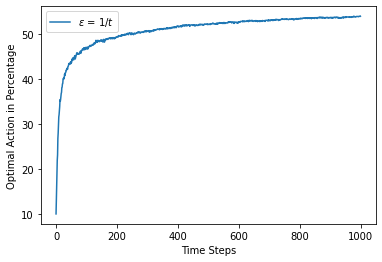

In [10]:
# plotting the Graph for epsilon that varies over time i.e. epsilon = 1/t
plt.plot(opt_t)
plt.ylabel("Optimal Action in Percentage")
plt.xlabel("Time Steps")
plt.legend(["$\epsilon$ = $1/t$"])
plt.show()

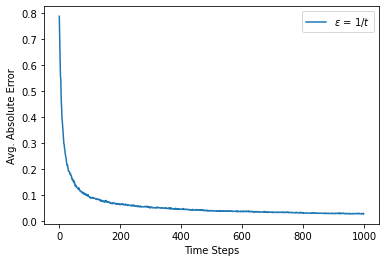

In [11]:
# plotting the Graph for epsilon that varies over time i.e. epsilon = 1/t
plt.plot(err_t)
plt.ylabel("Avg. Absolute Error")
plt.xlabel("Time Steps")
plt.legend(["$\epsilon$ = $1/t$"])
plt.show()

## **Q2**

In [12]:
# Average Values of Rewards, Optimal Action, Absolute Error for epsilon = 0.1, 0.01, 0
eps_0pnt1,opt_0pnt1,err_0pnt1=e_greedy(0.1,4)
eps_0pnt01,opt_0pnt01,err_0pnt01=e_greedy(0.01,4)
eps_0,opt_0,err_0=e_greedy(0,4)

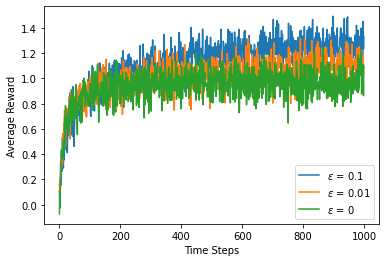

In [13]:
# plotting the Graph for '3' fixed values of Epsilon
plt.plot(eps_0pnt1)
plt.plot(eps_0pnt01)
plt.plot(eps_0)
plt.ylabel("Average Reward")
plt.xlabel("Time Steps")
plt.legend(["$\epsilon$ = 0.1","$\epsilon$ = 0.01","$\epsilon$ = 0"])
plt.show()

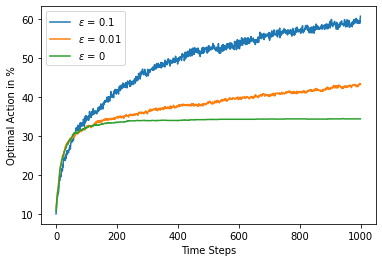

In [14]:
# plotting the Graph for '3' fixed values of Epsilon
plt.plot(opt_0pnt1)
plt.plot(opt_0pnt01)
plt.plot(opt_0)
plt.ylabel("Optimal Action in %")
plt.xlabel("Time Steps")
plt.legend(["$\epsilon$ = 0.1","$\epsilon$ = 0.01","$\epsilon$ = 0"])
plt.show()

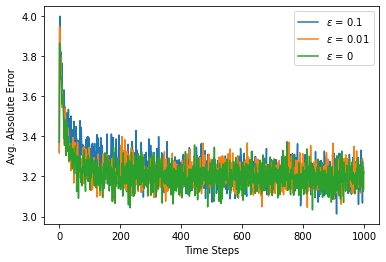

In [15]:
# plotting the Graph for '3' fixed values of Epsilon
plt.plot(err_0pnt1)
plt.plot(err_0pnt01)
plt.plot(err_0)
plt.ylabel("Avg. Absolute Error")
plt.xlabel("Time Steps")
plt.legend(["$\epsilon$ = 0.1","$\epsilon$ = 0.01","$\epsilon$ = 0"])
plt.show()

In [16]:
# calling the Function
eps_t,err_t,opt_t = e_greedy_t(4)

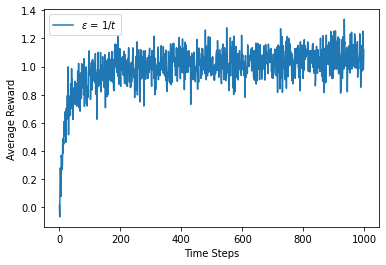

In [17]:
# plotting the Graph for epsilon that varies over time i.e. epsilon = 1/t
plt.plot(eps_t)
plt.ylabel("Average Reward")
plt.xlabel("Time Steps")
plt.legend(["$\epsilon$ = $1/t$"])
plt.show()

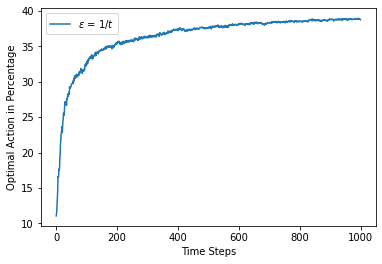

In [18]:
# plotting the Graph for epsilon that varies over time i.e. epsilon = 1/t
plt.plot(opt_t)
plt.ylabel("Optimal Action in Percentage")
plt.xlabel("Time Steps")
plt.legend(["$\epsilon$ = $1/t$"])
plt.show()

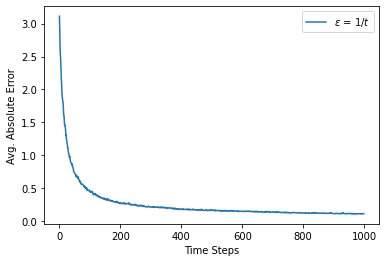

In [19]:
# plotting the Graph for epsilon that varies over time i.e. epsilon = 1/t
plt.plot(err_t)
plt.ylabel("Avg. Absolute Error")
plt.xlabel("Time Steps")
plt.legend(["$\epsilon$ = $1/t$"])
plt.show()